In [ ]:
# Importing library 

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score
import string
import re
import nltk

In [ ]:
data = pd.read_csv("/content/stress (1).csv")

In [ ]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))


def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


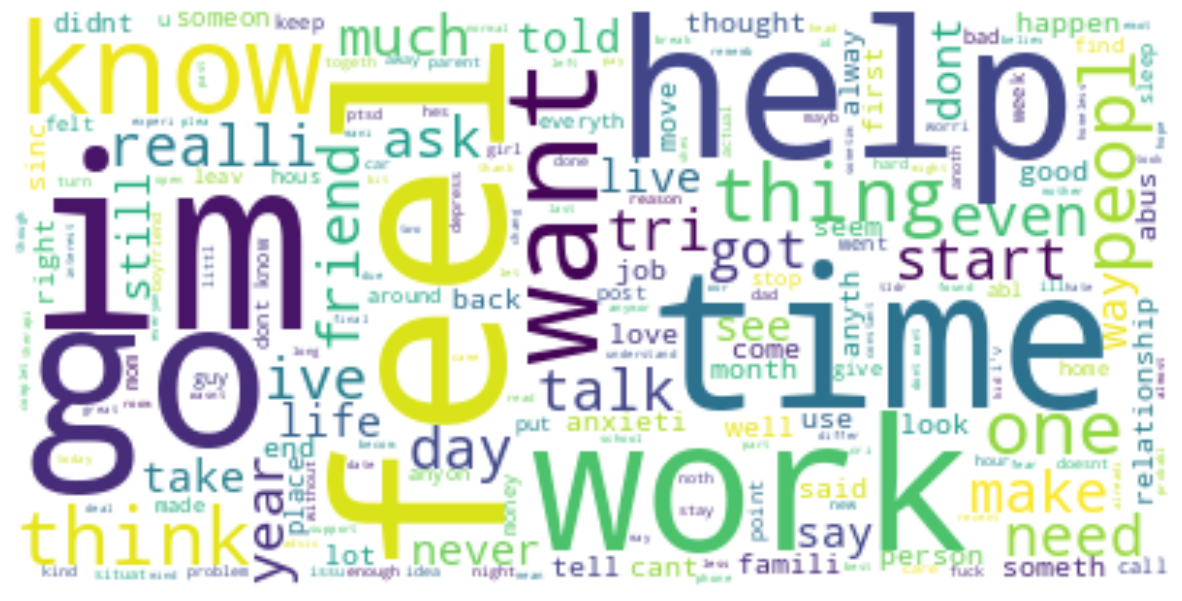

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
data_1 = data
data = data[["text", "label","social_upvote_ratio","confidence","syntax_ari","sentiment"]]

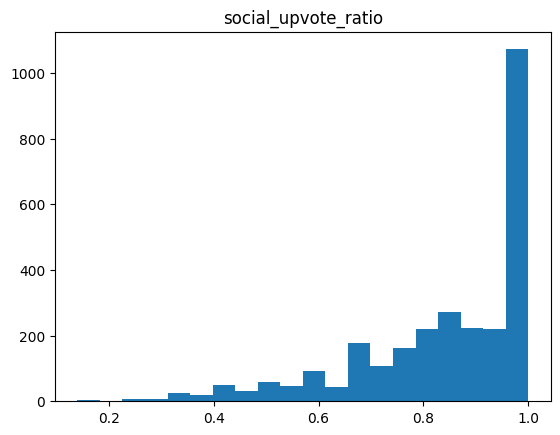

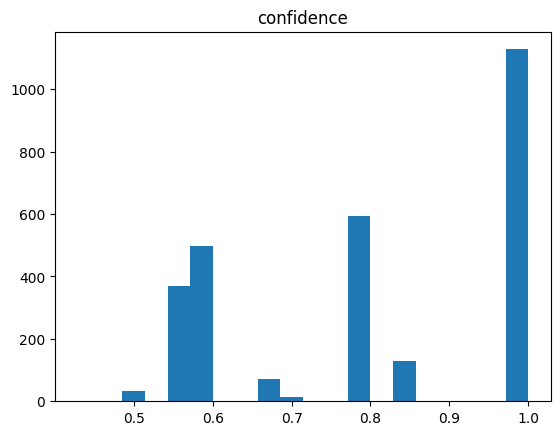

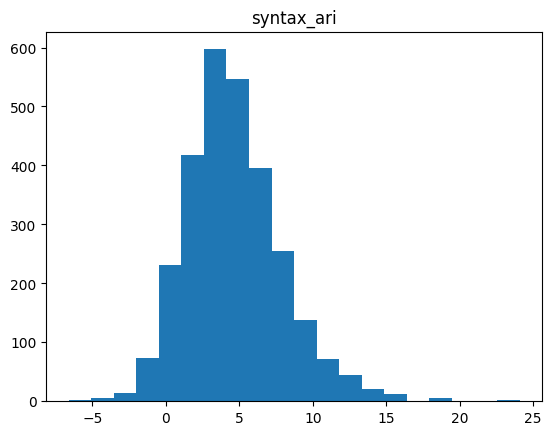

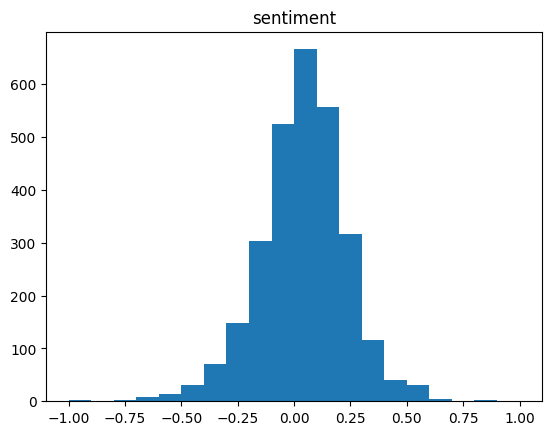

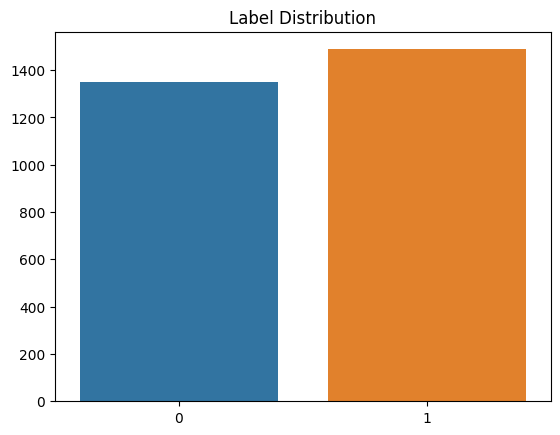

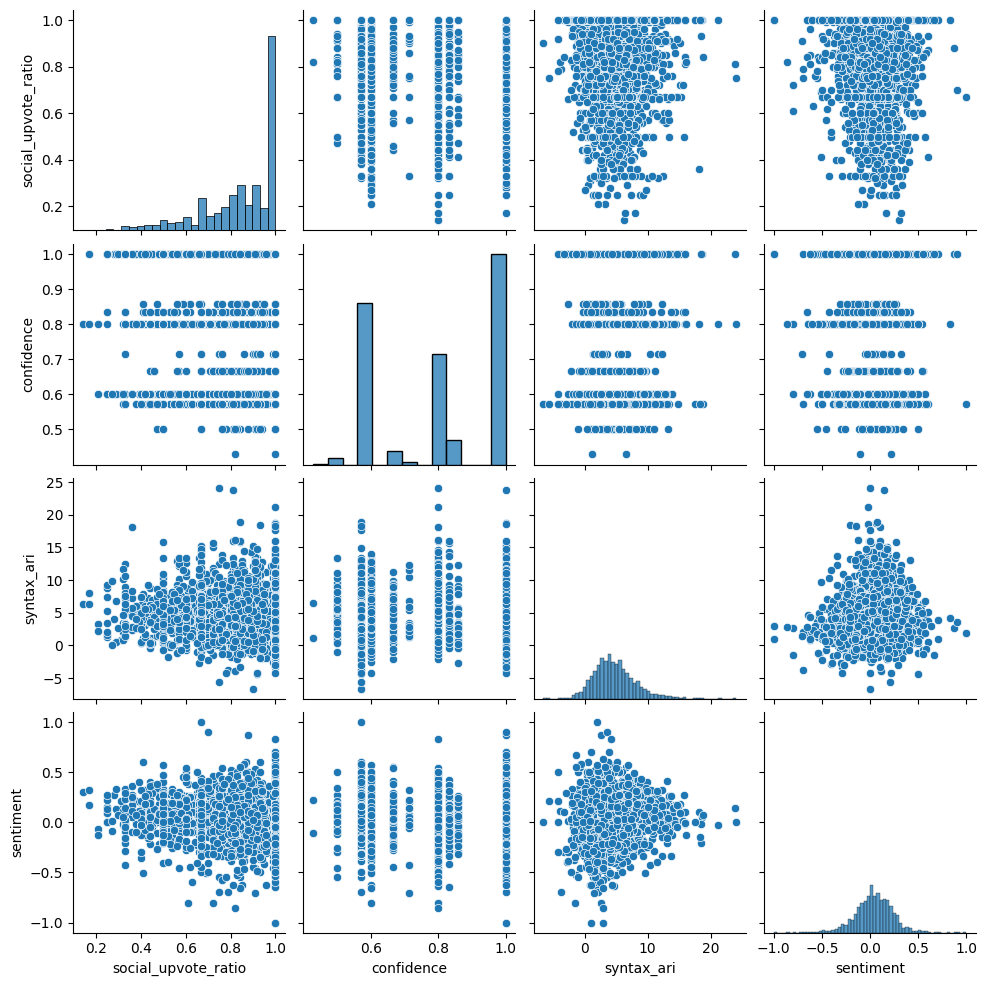

In [ ]:
for feature in ['social_upvote_ratio', 'confidence', 'syntax_ari', 'sentiment']:
    plt.hist(data[feature], bins=20)
    plt.title(feature)
    plt.show()

# Create a bar chart for the label feature
label_counts = data['label'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Label Distribution')
plt.show()

# Create a scatterplot matrix for the numeric features
sns.pairplot(data[['social_upvote_ratio', 'confidence', 'syntax_ari', 'sentiment']])
plt.show()



In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_text = np.array(data["text"])
X_social = np.array(data["social_upvote_ratio"])
X_confidence = np.array(data["confidence"])
X_syntax_ari = np.array(data["syntax_ari"])
X_sentiment = np.array(data["sentiment"])

cv = CountVectorizer()
X_text_counts = cv.fit_transform(X_text)

X_social = np.expand_dims(X_social, axis=1)  # Reshape to (n_samples, 1)
X_confidence = np.expand_dims(X_confidence, axis=1)  # Reshape to (n_samples, 1)
X_syntax_ari = np.expand_dims(X_syntax_ari, axis=1)  # Reshape to (n_samples, 1)
X_sentiment = np.expand_dims(X_sentiment, axis=1)  # Reshape to (n_samples, 1)

X = np.concatenate((X_text_counts.toarray(), X_social, X_confidence, X_syntax_ari, X_sentiment), axis=1)
y = np.array(data["label"])

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)

imputer = SimpleImputer(strategy='mean')
xtrain_imputed = imputer.fit_transform(xtrain)
xtest_imputed = imputer.transform(xtest)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

svm_model = SVC(kernel='linear')
svm_model.fit(xtrain_imputed, ytrain)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(xtrain_imputed, ytrain)


KNeighborsClassifier()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(xtrain, ytrain)

import xgboost as xgb

# Train the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(xtrain, ytrain)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

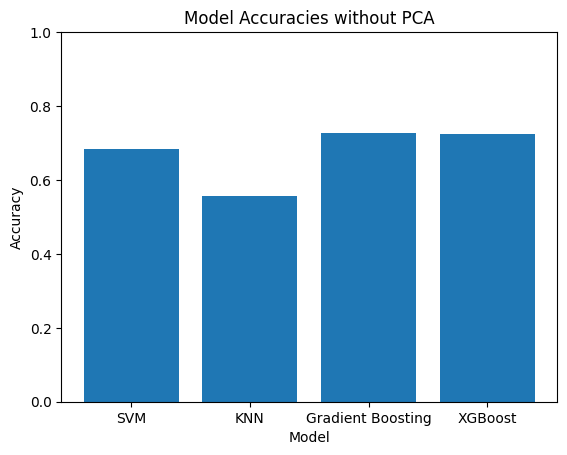

In [ ]:
# Make predictions for all models
svm_preds = svm_model.predict(xtest_imputed)
knn_preds = knn_model.predict(xtest_imputed)
gb_preds = gb_model.predict(xtest)
xgb_preds = xgb_model.predict(xtest)

# Calculate accuracies for all models
svm_acc = accuracy_score(ytest, svm_preds)
knn_acc = accuracy_score(ytest, knn_preds)
gb_acc = accuracy_score(ytest, gb_preds)
xgb_acc = accuracy_score(ytest, xgb_preds)

# Plot the accuracies
models = ['SVM', 'KNN', 'Gradient Boosting', 'XGBoost']
accuracies = [svm_acc, knn_acc, gb_acc, xgb_acc]

plt.bar(models, accuracies)
plt.title('Model Accuracies ')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()


In [ ]:
print(svm_acc)
print(knn_acc)
print(gb_acc)
print(xgb_acc)

0.6840981856990395
0.5570971184631803
0.7257203842049093
0.7246531483457844


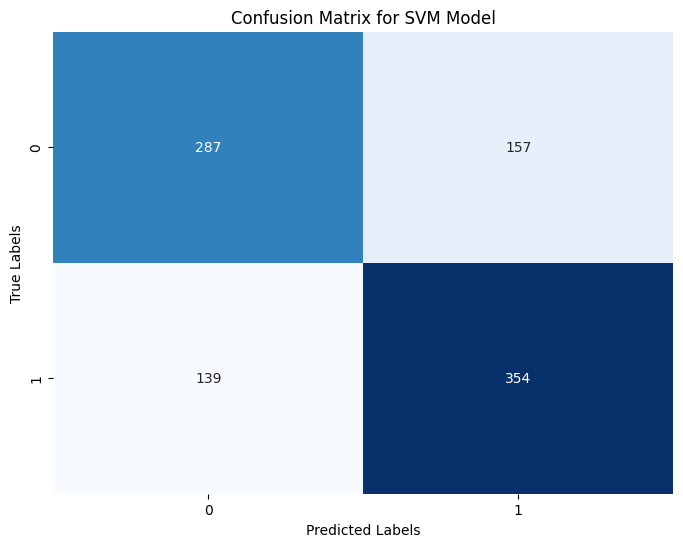

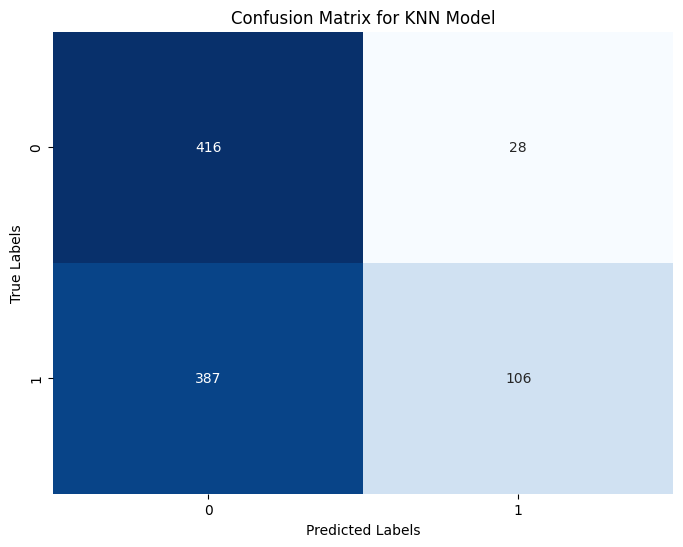

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix for SVM model
svm_cm = confusion_matrix(ytest, svm_preds)

# Plot the confusion matrix for SVM model
plt.figure(figsize=(8,6))
sns.heatmap(svm_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

knn_cm = confusion_matrix(ytest, knn_preds)

# Plot the confusion matrix for KNN model
plt.figure(figsize=(8,6))
sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

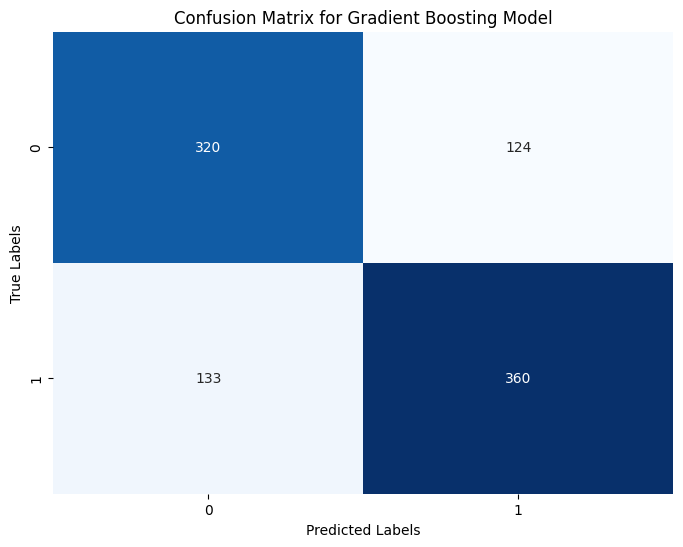

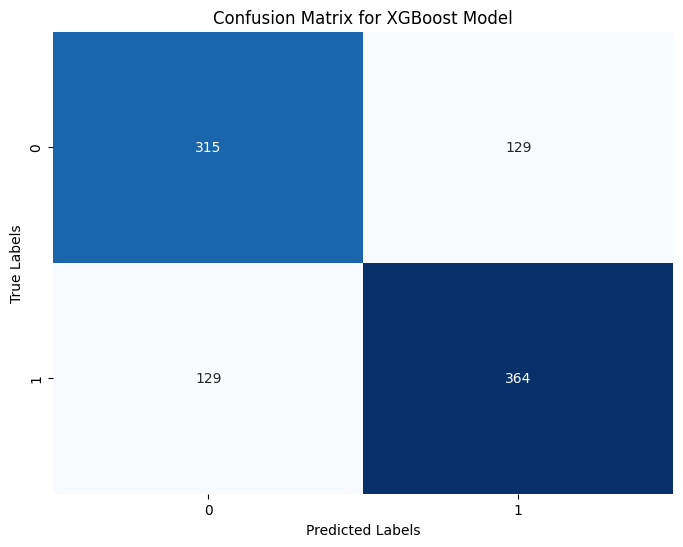

In [ ]:
# Calculate the confusion matrix for Gradient Boosting model
gb_cm = confusion_matrix(ytest, gb_preds)

# Plot the confusion matrix for Gradient Boosting model
plt.figure(figsize=(8,6))
sns.heatmap(gb_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate the confusion matrix for XGBoost model
xgb_cm = confusion_matrix(ytest, xgb_preds)

# Plot the confusion matrix for XGBoost model
plt.figure(figsize=(8,6))
sns.heatmap(xgb_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix for XGBoost Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()